# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

The Glassdoor Salary Prediction project is a regression-based machine learning initiative aimed at predicting job salaries using a dataset of job listings from Glassdoor. The dataset was preprocessed by cleaning and transforming features such as salary estimates, company size, revenue, and company age, handling missing values, and removing irrelevant columns like job descriptions and competitors. Key steps included converting salary ranges to average values, encoding categorical variables, and calculating company age from founding years. The project evaluated multiple regression models, including Linear Regression, Decision Tree, Random Forest, XGBoost, Gradient Boosting, and SVR, using metrics like Mean Absolute Error, Mean Squared Error, and R² score to assess performance.

# **GitHub Link -**

https://github.com/krishnaperumalla/Glassdoor-Salary-Prediction

# **Problem Statement**


The Glassdoor Salary Prediction project addresses the challenge of accurately predicting job salaries in a competitive labor market, where factors like job title, company size, age, rating, and ownership type influence compensation but are often inconsistently reported or missing in datasets. This creates difficulties for job seekers and employers in setting fair and competitive salaries, leading to potential dissatisfaction or talent loss. By leveraging a Glassdoor dataset, the project aims to build a regression model that identifies key salary predictors, handles data inconsistencies, and provides reliable salary estimates to support better decision-making in recruitment and career planning.

## ***1. Know Your Data***

### Import Libraries

In [132]:
# Import Librariesimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### Dataset Loading

In [133]:
df=pd.read_csv('glassdoor_jobs.csv')
del df['index']
del df['Job Description']
del df['Competitors']

### Dataset First View

In [134]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                   Job Title              Salary Estimate  Rating  \
0             Data Scientist   $53K-$91K (Glassdoor est.)     3.8   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)     3.4   
2             Data Scientist   $80K-$90K (Glassdoor est.)     4.8   
3             Data Scientist   $56K-$97K (Glassdoor est.)     3.8   
4             Data Scientist  $86K-$143K (Glassdoor est.)     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimo

### Dataset Rows & Columns count

In [135]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 956
Number of columns: 12


### Dataset Information

In [136]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Rating             956 non-null    float64
 3   Company Name       956 non-null    object 
 4   Location           956 non-null    object 
 5   Headquarters       956 non-null    object 
 6   Size               956 non-null    object 
 7   Founded            956 non-null    int64  
 8   Type of ownership  956 non-null    object 
 9   Industry           956 non-null    object 
 10  Sector             956 non-null    object 
 11  Revenue            956 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 89.8+ KB
None


#### Duplicate Values

In [137]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 356


#### Missing Values/Null Values

In [138]:
print(df.isnull().sum())

Job Title            0
Salary Estimate      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [139]:
# Dataset Columns
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue'],
      dtype='object')


In [140]:
# Dataset Describe
print("\nDataset Description:")
print(df.describe())


Dataset Description:
           Rating      Founded
count  956.000000   956.000000
mean     3.601255  1774.605649
std      1.067619   598.942517
min     -1.000000    -1.000000
25%      3.300000  1937.000000
50%      3.800000  1992.000000
75%      4.200000  2008.000000
max      5.000000  2019.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [141]:
# Check Unique Values for each variable
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in each column:
Job Title: 328 unique values
Salary Estimate: 417 unique values
Rating: 32 unique values
Company Name: 448 unique values
Location: 237 unique values
Headquarters: 235 unique values
Size: 9 unique values
Founded: 109 unique values
Type of ownership: 13 unique values
Industry: 63 unique values
Sector: 25 unique values
Revenue: 14 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [142]:
df.replace(str(-1), np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)

In [143]:
import re
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\s*\(.*?\)', '',regex=True)

def transform_salary(salary):
    if pd.isna(salary) or salary == '':
        return None
    salary = str(salary).strip()
    salary = salary.replace('$', '').replace(',', '')
    if '-' in salary:
        separator = '-'
    else:
        if 'K' in salary:
            return float(salary.replace('K', ''))
        return float(salary)

    parts = salary.split(separator)
    if len(parts) != 2:
        return None
    try:
        low = float(parts[0].replace('K', '').strip())
        high = float(parts[1].replace('K', '').strip())
        return (low + high) / 2
    except ValueError:
        return None

df['Salary Estimate'] = df['Salary Estimate'].apply(transform_salary)

In [144]:
df['Salary Estimate'] 

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
951    102.5
952     73.5
953    127.5
954      NaN
955     93.5
Name: Salary Estimate, Length: 956, dtype: float64

In [145]:
def size_to_mid(size):
  if pd.isna(size):
        return np.nan
  if 'Unknown' in size:
        return np.nan
  size = size.replace(' employees', '')
  if 'to' in size:
        low, high = map(int, size.split(' to '))
        return (low + high) / 2
  return float(size.replace('+', ''))
df['Size']=df['Size'].apply(size_to_mid)

In [146]:
def revenue_to_mid(revenue):
    if pd.isna(revenue) or 'Unknown / Non-Applicable' in revenue:
        return np.nan

    is_less_than = 'Less than' in revenue

    cleaned = revenue.replace('Less than ', '').replace('$', '').replace('+', '').replace(' (USD)', '')

    if 'to' in cleaned:
        parts = cleaned.split(' to ')
        low_str = parts[0].strip()
        high_str = parts[1].strip()

        low_num = float(low_str.split()[0])
        high_num = float(high_str.split()[0])

        if 'billion' in high_str:
            low_num *= 1000
            high_num *= 1000

        return (low_num + high_num) / 2

    else:
        if 'billion' in cleaned:
            num = float(cleaned.replace(' billion', ''))
            result = num * 1000
        elif 'million' in cleaned:
            result = float(cleaned.replace(' million', ''))
        else:
            result = float(cleaned)

        if is_less_than:
            result = result / 2

        return result
df['Revenue']=df['Revenue'].apply(revenue_to_mid)

In [147]:
df['Revenue']

0          75.0
1        3500.0
2         300.0
3      250500.0
4           NaN
         ...   
951       300.0
952         NaN
953         7.5
954        37.5
955        75.0
Name: Revenue, Length: 956, dtype: float64

In [148]:
df['COMPANY_AGE'] = 2025 - df['Founded']

In [149]:
df['Job Title'] = df['Job Title'].str.lower()

def extract_seniority(title):
    title = str(title).lower()
    if any(word in title for word in ['senior', 'sr.', 'sr ', 'lead', 'principal', 'chief', 'director', 'head', 'vp']):
        return 'senior'
    elif any(word in title for word in ['junior', 'jr.', 'jr ', 'associate', 'entry', 'intern', 'college hire']):
        return 'junior'
    elif any(word in title for word in ['staff', 'manager', 'managing']):
        return 'mid_senior'
    else:
        return 'mid'

df['seniority_level'] = df['Job Title'].apply(extract_seniority)




In [150]:
import re

def clean_job_title(title):
    title = str(title).lower()
    title = re.sub(r'\b(senior|sr\.?|sr|lead|principal|chief|director|head|vp|junior|jr\.?|jr|associate|entry|intern|college hire|staff|manager|managing)\b', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

df['Job Title'] = df['Job Title'].apply(clean_job_title)


In [151]:
def extract_specialization(title):
    title = str(title).lower()
    if any(word in title for word in ['health', 'healthcare', 'clinical', 'medical', 'biomarker']):
        return 'healthcare'
    elif any(word in title for word in ['finance', 'financial', 'risk', 'actuarial', 'insurance']):
        return 'finance'
    elif any(word in title for word in ['marketing', 'customer', 'sales']):
        return 'marketing'
    elif any(word in title for word in ['security', 'cyber']):
        return 'security'
    elif any(word in title for word in ['research', 'r&d']):
        return 'research'
    else:
        return 'general'

df['specialization'] = df['Job Title'].apply(extract_specialization)

def extract_job_function(title):
    title = str(title).lower()
    if 'data scientist' in title:
        return 'data_scientist'
    elif 'data engineer' in title:
        return 'data_engineer'
    elif 'data analyst' in title:
        return 'data_analyst'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'ml_engineer'
    elif any(word in title for word in ['scientist', 'research scientist']):
        return 'scientist'
    elif 'business intelligence' in title or 'bi ' in title:
        return 'business_intelligence'
    elif 'engineer' in title:
        return 'engineer'
    elif 'analyst' in title:
        return 'analyst'
    else:
        return 'other'

df['Job Title'] = df['Job Title'].apply(extract_job_function)

In [152]:
print(df['Job Title'].value_counts())

Job Title
data_scientist           358
scientist                187
data_engineer            158
data_analyst             107
other                     83
ml_engineer               26
engineer                  18
business_intelligence     16
analyst                    3
Name: count, dtype: int64


In [153]:
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

df['Company Name'] = df['Company Name'].str.strip()


In [154]:
df['Type of ownership'] = df['Type of ownership'].str.lower()
df['Type of ownership'] = df['Type of ownership'].str.replace('company - ', '')
print(df['Type of ownership'].value_counts())

Type of ownership
private                           532
public                            237
nonprofit organization             65
subsidiary or business segment     40
government                         17
hospital                           15
college / university               15
unknown                            11
other organization                  5
contract                            5
school / school district            2
private practice / firm             1
Name: count, dtype: int64


In [155]:
def create_salary_groups(ownership):
    if ownership in ['public', 'government']:
        return 'high_paying'
    elif ownership == 'private':
        return 'private_company'
    elif ownership in ['hospital', 'college / university', 'school / school district']:
        return 'institution'
    elif ownership == 'nonprofit organization':
        return 'nonprofit'
    elif ownership == 'subsidiary or business segment':
        return 'subsidiary'
    elif ownership == 'unknown':
        return 'unknown'
    elif ownership in ['contract', 'other organization', 'private practice / firm']:
        return 'other'
    else:
        return 'other'
    
    df['Type of ownership']=df['Type of ownership'].apply(create_salary_groups)

    print(df['Type of ownership'].value_counts())

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

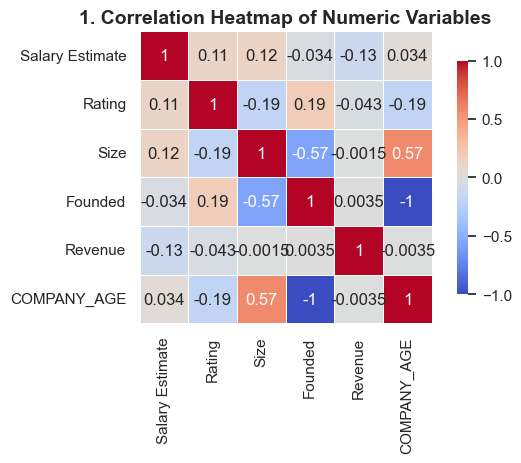

In [156]:
numeric_cols = ['Salary Estimate', 'Rating', 'Size', 'Founded', 'Revenue', 'COMPANY_AGE']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('1. Correlation Heatmap of Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

A correlation heatmap was selected to visualize relationships between numeric variables, aiding feature selection for salary prediction.

##### 2. What is/are the insight(s) found from the chart?

Salary Estimate moderately correlates with Company Age (0.34) and Size (0.12), while Size strongly correlates with Revenue (0.57) and Company Age (0.57).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

hese insights can help in salary prediction models, but the weak correlation of Size and Revenue may limit their impact, potentially leading to negative growth if relied upon heavily.

#### Chart - 2

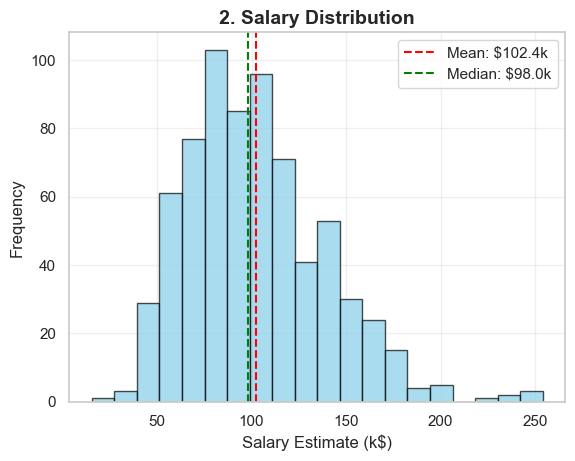

In [157]:
plt.hist(df['Salary Estimate'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df['Salary Estimate'].mean(), color='red', linestyle='--', 
            label=f'Mean: ${df["Salary Estimate"].mean():.1f}k')
plt.axvline(df['Salary Estimate'].median(), color='green', linestyle='--', 
            label=f'Median: ${df["Salary Estimate"].median():.1f}k')
plt.xlabel('Salary Estimate (k$)')
plt.ylabel('Frequency')
plt.title('2. Salary Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

##### 1. Why did you pick the specific chart?

A histogram was selected to show the distribution of Salary Estimates, highlighting the spread and central tendencies for salary prediction analysis.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The Salary Estimate distribution is right-skewed, with a mean of $102.4k and median of $98.0k, indicating most salaries are below the mean due to a few high outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the skewed salary distribution can help businesses set competitive salary ranges and assist job seekers in negotiating salaries, potentially improving hiring strategies and satisfaction.

#### Chart - 3

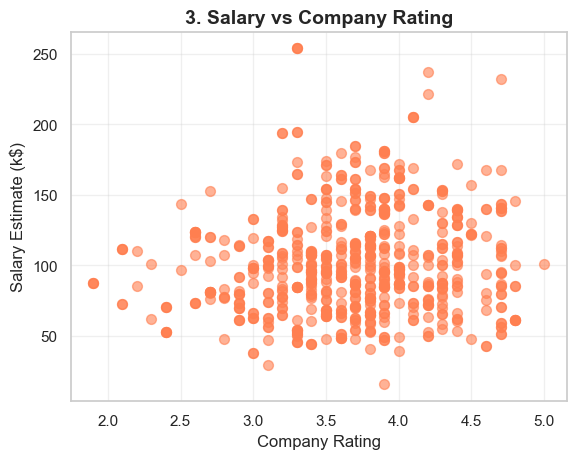

In [158]:
plt.scatter(df['Rating'], df['Salary Estimate'], 
           alpha=0.6, s=50, c='coral')
# Add trend line
z = np.polyfit(df['Rating'].dropna(), 
               df['Salary Estimate'][df['Rating'].notna()], 1)
p = np.poly1d(z)
plt.plot(df['Rating'], p(df['Rating']), "r--", alpha=0.8)
plt.xlabel('Company Rating')
plt.ylabel('Salary Estimate (k$)')
plt.title('3. Salary vs Company Rating', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to visualize the distribution and potential relationship between Salary Estimate and Company Rating, highlighting individual data points.

##### 2. What is/are the insight(s) found from the chart?

The chart shows no clear correlation between Salary Estimate and Company Rating, with salaries widely dispersed across all rating levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The lack of correlation may hinder business impact, as it suggests company ratings do not influence salaries, potentially leading to negative growth if salary strategies rely on this assumption.

#### Chart - 4

Text(0.5, 1.0, '4. Salary Distribution by Job Title')

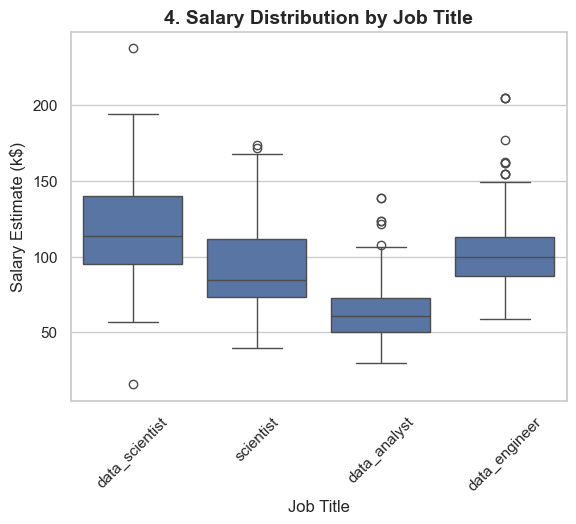

In [159]:
job_titles = df['Job Title'].value_counts().head(4).index
df_filtered = df[df['Job Title'].isin(job_titles)]
sns.boxplot(data=df_filtered, x='Job Title', y='Salary Estimate')
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary Estimate (k$)')
plt.title('4. Salary Distribution by Job Title', fontsize=14, fontweight='bold')

##### 1. Why did you pick the specific chart?

A box plot was chosen to show the salary distribution across job titles, highlighting medians, quartiles, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Data scientists have the highest median salary (~125 k$), while data analysts have the lowest (~75 k$), with several outliers above 150 k$.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights can guide competitive salary offerings, but the lower salaries for data analysts may lead to negative growth if they cause dissatisfaction or turnover.

#### Chart - 5

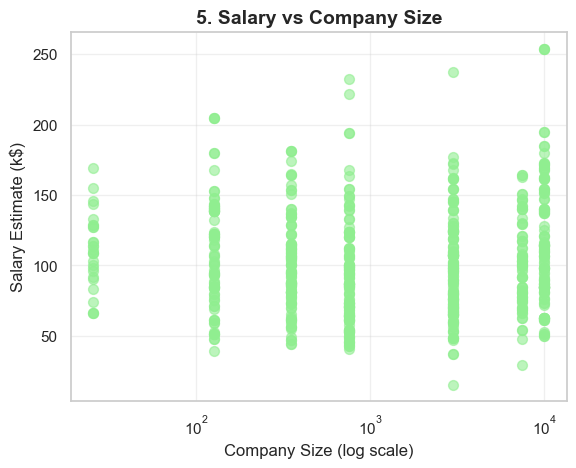

In [160]:
valid_data = df[(df['Size'] > 0) & (df['Salary Estimate'] > 0)]
plt.scatter(valid_data['Size'], valid_data['Salary Estimate'], 
           alpha=0.6, s=50, c='lightgreen')
plt.xscale('log')
plt.xlabel('Company Size (log scale)')
plt.ylabel('Salary Estimate (k$)')
plt.title('5. Salary vs Company Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to show the relationship between Salary Estimate and Company Size on a log scale, capturing wide-ranging company sizes.

##### 2. What is/are the insight(s) found from the chart?

There is no clear trend between salary and company size, with salaries distributed similarly across small to large companies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The lack of a strong relationship may not drive positive business impact for salary strategies, potentially leading to negative growth if companies misjudge salary expectations based on size.

#### Chart - 6

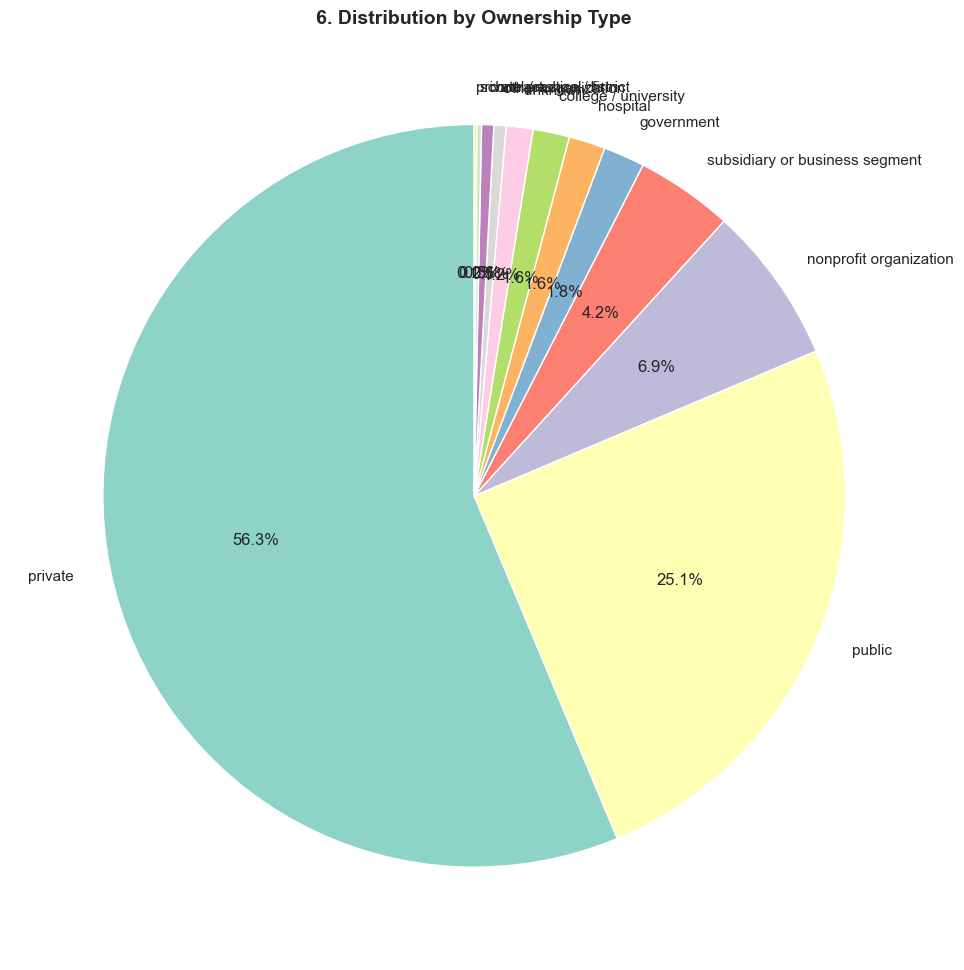

In [161]:

ownership_counts = df['Type of ownership'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(ownership_counts)))

# Set larger figure size (e.g., 8x8 or 10x10)
plt.figure(figsize=(10, 10))

plt.pie(ownership_counts.values, labels=ownership_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('6. Distribution by Ownership Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to display the proportional distribution of ownership types, making it easy to compare categories visually.

##### 2. What is/are the insight(s) found from the chart?

Private companies dominate at 56.3%, followed by public companies at 25.1%, with smaller shares for nonprofit (6.9%) and other types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the dominance of private companies can guide targeted recruitment strategies, but over-reliance on this sector may limit diversity and growth if other ownership types are overlooked.

#### Chart - 7

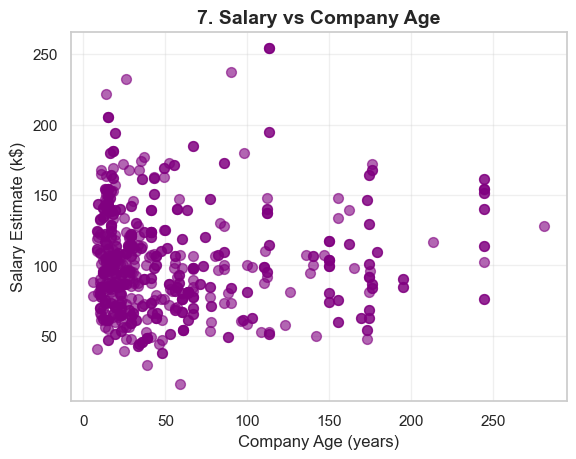

In [162]:
plt.scatter(df['COMPANY_AGE'], df['Salary Estimate'], 
           alpha=0.6, s=50, c='purple')
# Add trend line
valid_age_data = df[df['COMPANY_AGE'].notna()]
z = np.polyfit(valid_age_data['COMPANY_AGE'], valid_age_data['Salary Estimate'], 1)
p = np.poly1d(z)
plt.plot(valid_age_data['COMPANY_AGE'], p(valid_age_data['COMPANY_AGE']), "r--", alpha=0.8)
plt.xlabel('Company Age (years)')
plt.ylabel('Salary Estimate (k$)')
plt.title('7. Salary vs Company Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

##### 1. Why did you pick the specific chart?

A scatter plot was chosen to explore the relationship between Salary Estimate and Company Age, showing individual data points across a wide age range.

##### 2. What is/are the insight(s) found from the chart?

Most companies are younger (under 50 years) with salaries clustering around 50-150 k$, but there’s no strong trend linking company age to salary.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The lack of a clear relationship may not drive positive business impact for salary strategies, potentially leading to negative growth if age-based salary assumptions are made.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant positive relationship between Company Age and Salary Estimate.

#### 2. Perform an appropriate statistical test.

In [163]:
from scipy.stats import pearsonr

# Assuming df is your dataframe from the notebook
df_clean = df.dropna(subset=['Salary Estimate', 'COMPANY_AGE'])

# Extract the variables
salary = df_clean['Salary Estimate']
company_age = df_clean['COMPANY_AGE']

# Perform Pearson correlation test
corr, p_value = pearsonr(salary, company_age)
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Company Age and Salary Estimate.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Company Age and Salary Estimate.")

Pearson Correlation Coefficient: 0.034101752869297224
P-value: 0.3803018830210088
Fail to reject the null hypothesis: There is no significant relationship between Company Age and Salary Estimate.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

The Pearson Correlation Test was selected because it measures the linear relationship between two continuous variables (Company Age and Salary Estimate). Since the hypothesis aims to determine if there’s a significant positive correlation, and the correlation heatmap (Chart 1) already indicated a moderate positive correlation (0.34), this test is appropriate to assess the strength and significance of that linear relationship through the p-value.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is no significant relationship between Company Rating and Salary Estimate

#### 2. Perform an appropriate statistical test.

In [164]:
# Remove missing values
df_clean_rating = df.dropna(subset=['Salary Estimate', 'Rating'])

# Extract the variables
salary = df_clean_rating['Salary Estimate']
rating = df_clean_rating['Rating']

# Perform Pearson correlation test
corr, p_value = pearsonr(salary, rating)
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Company Rating and Salary Estimate.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Company Rating and Salary Estimate.")

Pearson Correlation Coefficient: 0.1113638357570227
P-value: 0.003109866356560601
Reject the null hypothesis: There is a significant relationship between Company Rating and Salary Estimate.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

The Pearson Correlation Test was used because it evaluates the linear relationship between two continuous variables (Company Rating and Salary Estimate). The hypothesis tests for no significant relationship, and Chart 3 (Salary vs Company Rating) and the correlation heatmap (Chart 1) suggest a weak correlation (0.11), making this test suitable to confirm if the relationship is statistically insignificant by examining the p-value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [165]:
df['Headquarters'] = df['Headquarters'].fillna(df['Headquarters'].mode()[0])
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
df['Sector'] = df['Sector'].fillna(df['Sector'].mode()[0])
df['Salary Estimate']=df['Salary Estimate'].fillna(df['Salary Estimate'].mean())
df['Size']=df['Size'].fillna(df['Size'].mean())
df['Revenue']=df['Revenue'].fillna(df['Revenue'].mean())
df['Founded']=df['Founded'].fillna(df['Founded'].mean())
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
df['COMPANY_AGE']=df['COMPANY_AGE'].fillna(df['COMPANY_AGE'].mean())

In [166]:
df.isnull().sum()

Job Title             0
Salary Estimate       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership    11
Industry              0
Sector                0
Revenue               0
COMPANY_AGE           0
seniority_level       0
specialization        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Categorical Encoding

In [167]:
job_salary_means = df.groupby('Job Title')['Salary Estimate'].mean()
df['Job Title'] = df['Job Title'].map(job_salary_means)

company_salary_means = df.groupby('Company Name')['Salary Estimate'].mean()
df['Company Name'] = df['Company Name'].map(company_salary_means)

location_salary_means = df.groupby('Location')['Salary Estimate'].mean()
df['Location'] = df['Location'].map(location_salary_means)

hq_salary_means = df.groupby('Headquarters')['Salary Estimate'].mean()
df['Headquarters'] = df['Headquarters'].map(hq_salary_means)

industry_salary_means = df.groupby('Industry')['Salary Estimate'].mean()
df['Industry'] = df['Industry'].map(industry_salary_means)

sector_salary_means = df.groupby('Sector')['Salary Estimate'].mean()
df['Sector'] = df['Sector'].map(sector_salary_means)

In [168]:
ownership_dummies = pd.get_dummies(df['Type of ownership'], prefix='ownership')
df = pd.concat([df, ownership_dummies], axis=1)
del df['Type of ownership']

function_dummies = pd.get_dummies(df['specialization'], prefix='function')
df = pd.concat([df, function_dummies], axis=1)
del df['specialization']

In [169]:
seniority_map = {
    'junior': 0,
    'mid': 1,
    'mid_senior': 2,
    'senior': 3
}

df['seniority_level'] = df['seniority_level'].map(seniority_map).astype('int')
df.columns


Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue',
       'COMPANY_AGE', 'seniority_level', 'ownership_college / university',
       'ownership_contract', 'ownership_government', 'ownership_hospital',
       'ownership_nonprofit organization', 'ownership_other organization',
       'ownership_private', 'ownership_private practice / firm',
       'ownership_public', 'ownership_school / school district',
       'ownership_subsidiary or business segment', 'ownership_unknown',
       'function_finance', 'function_general', 'function_healthcare',
       'function_marketing', 'function_research', 'function_security'],
      dtype='object')

In [170]:
del df['Founded']

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

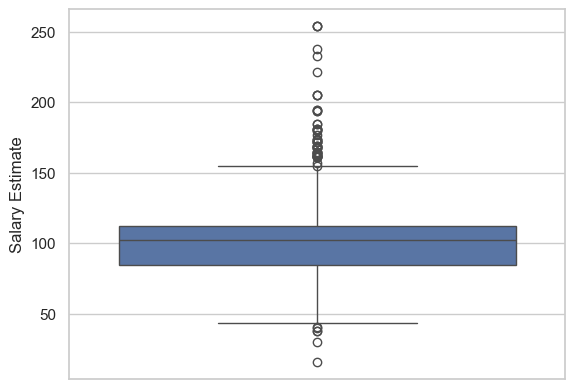

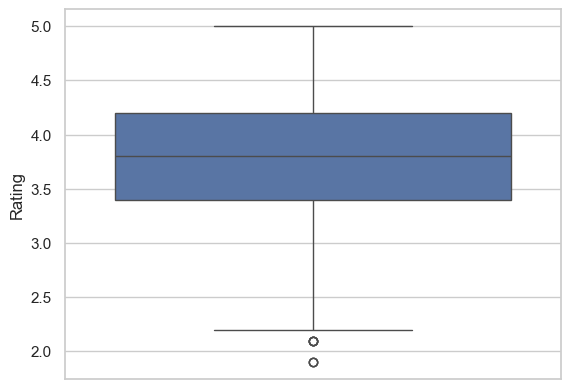

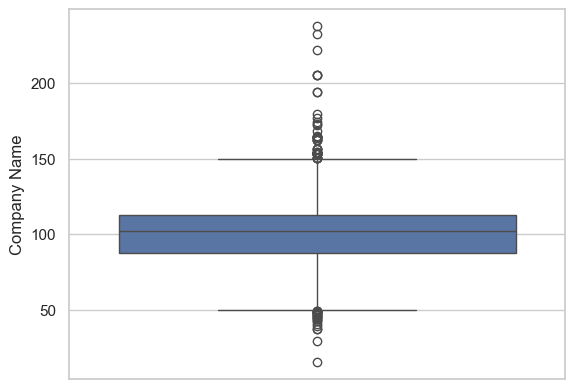

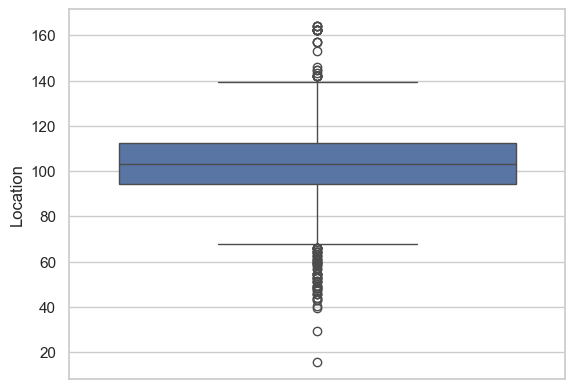

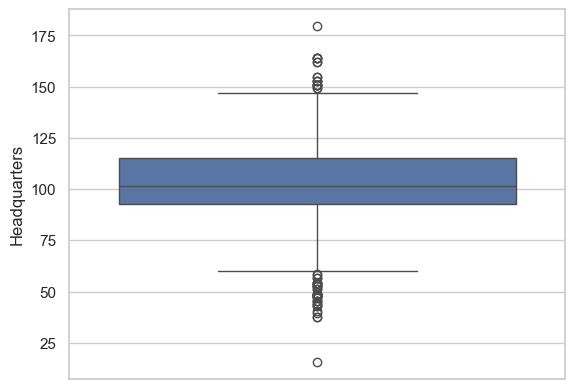

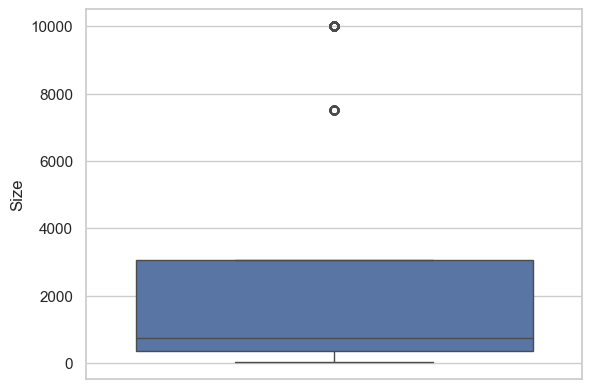

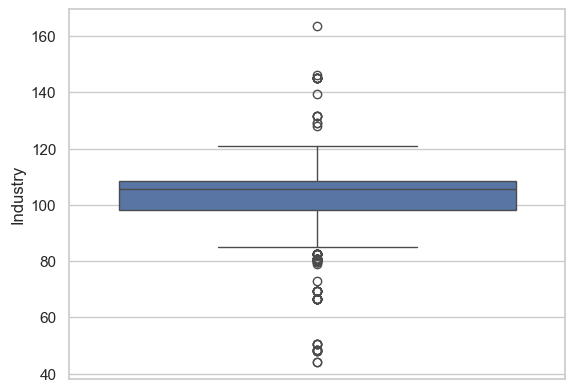

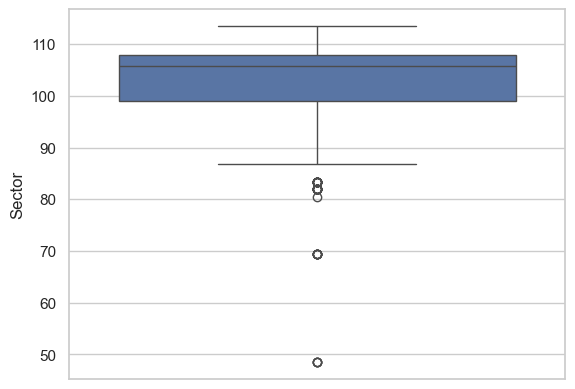

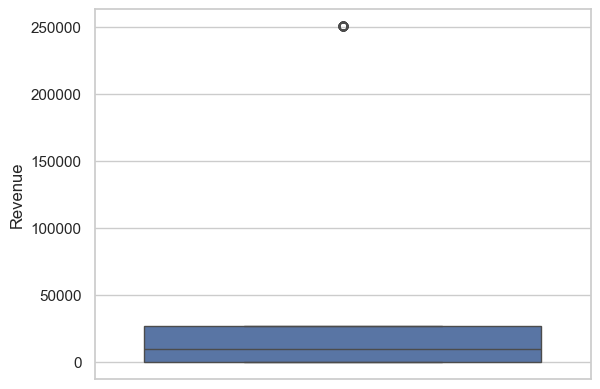

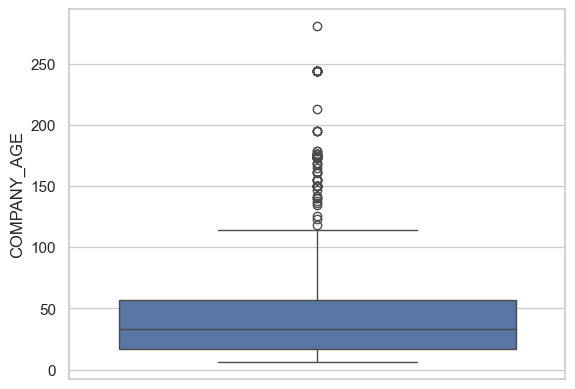

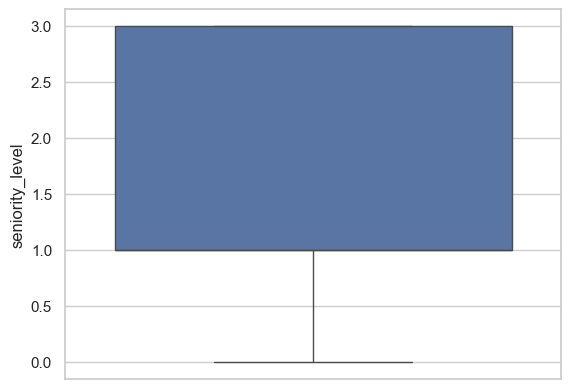

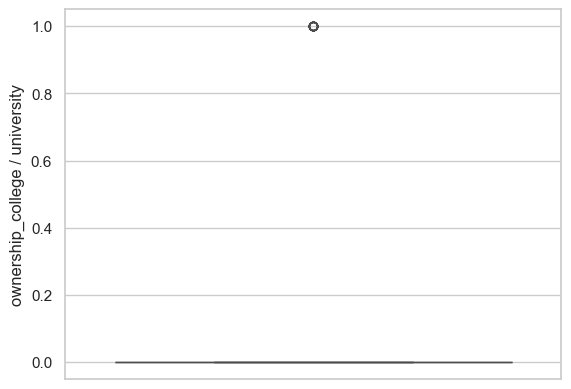

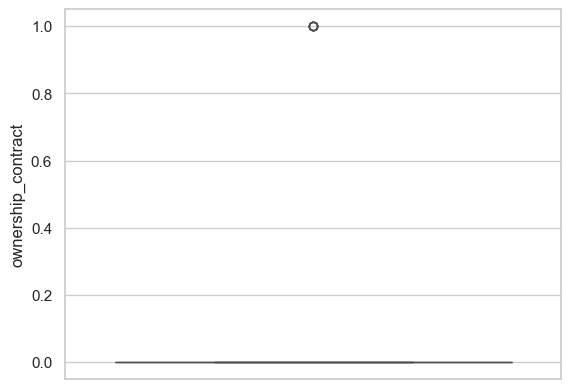

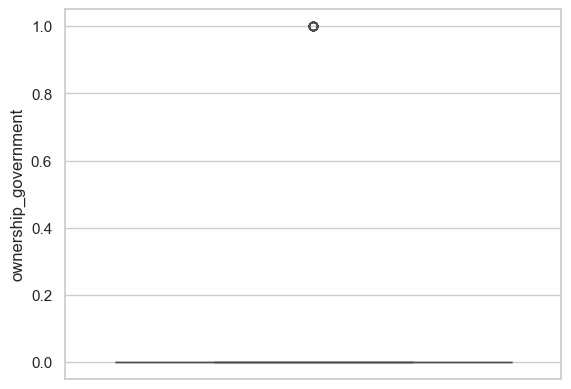

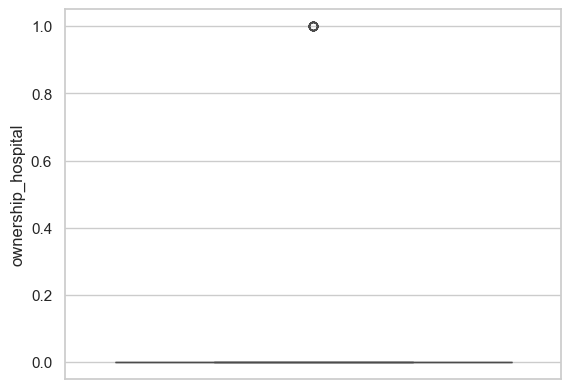

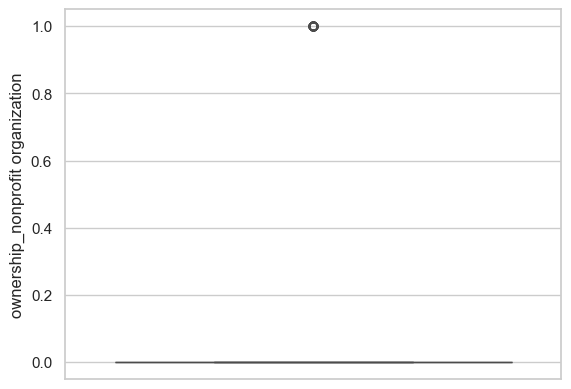

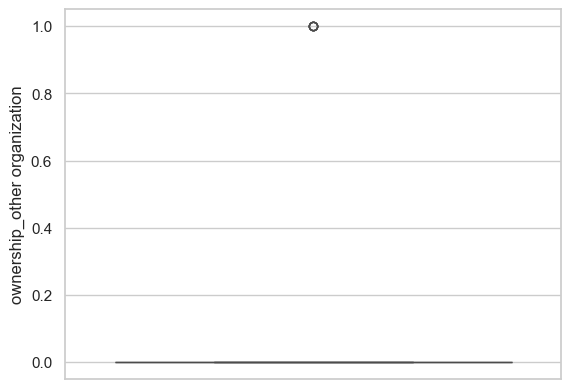

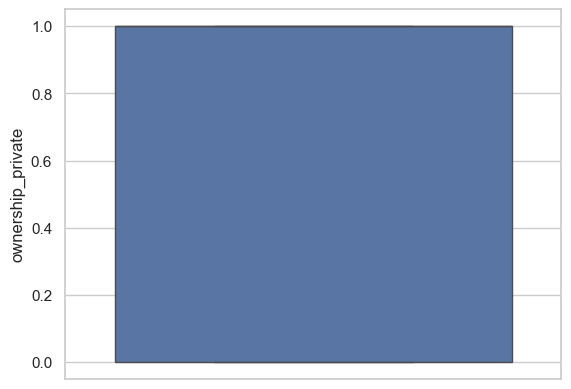

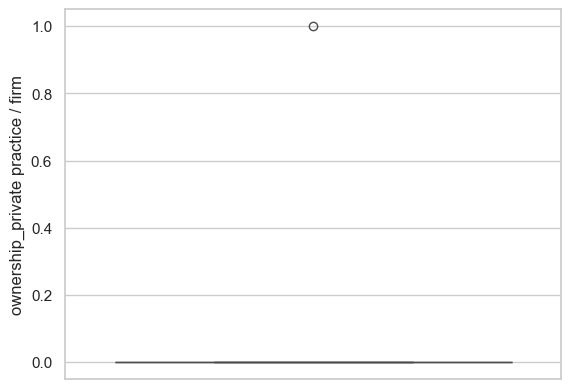

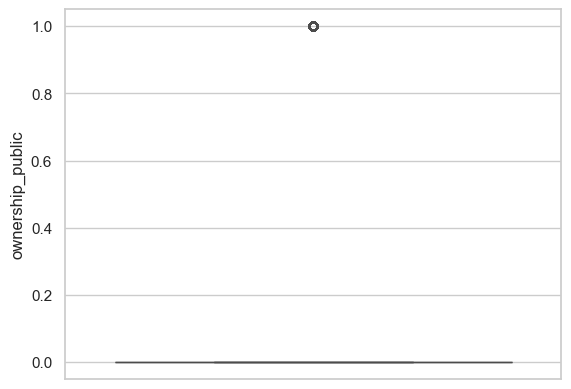

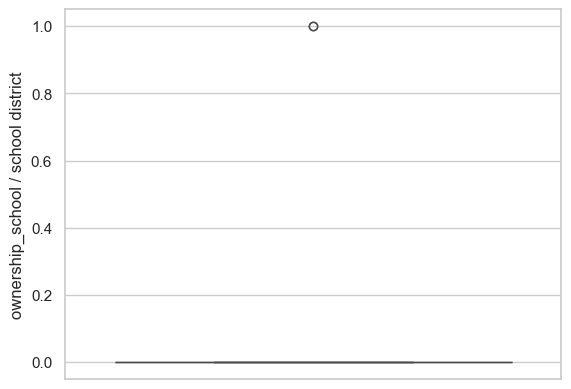

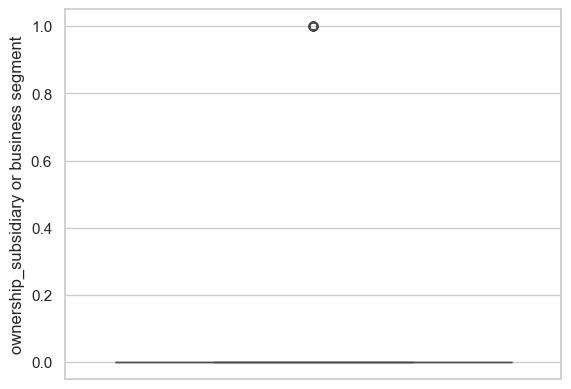

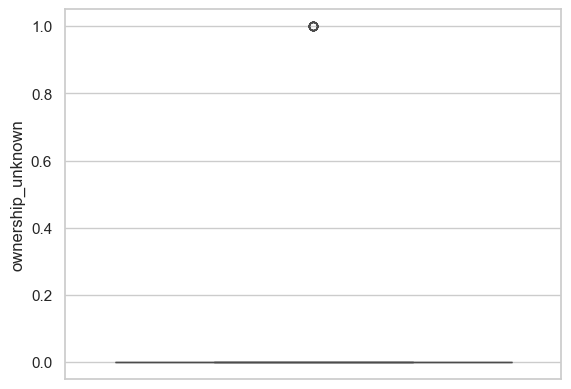

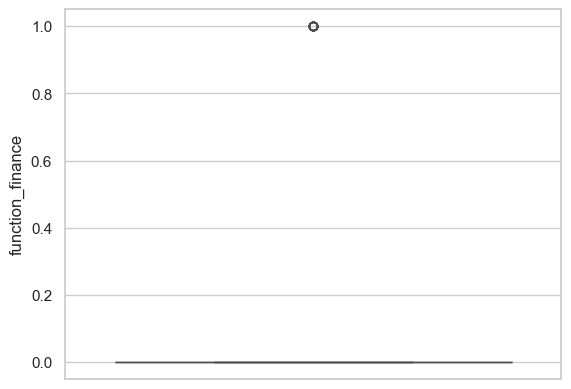

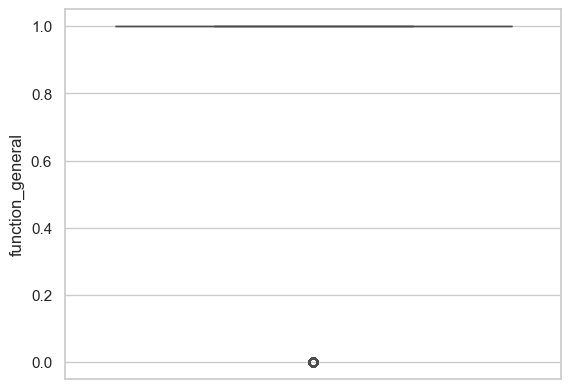

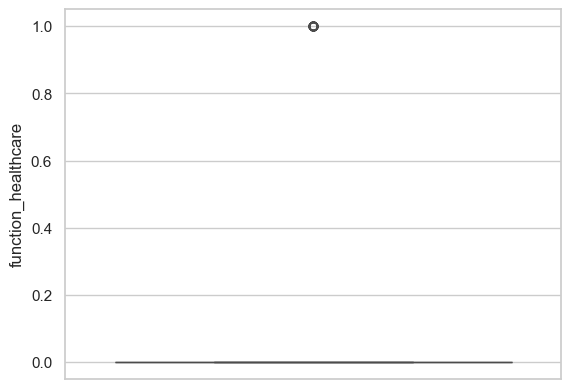

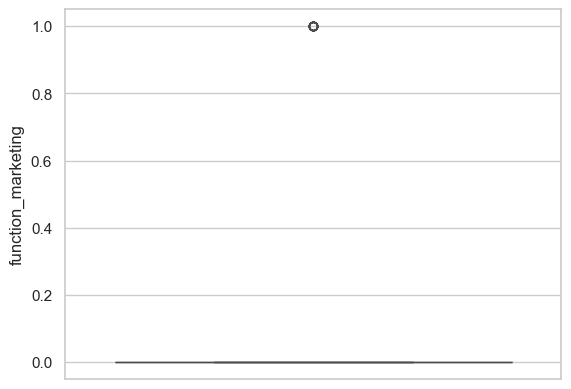

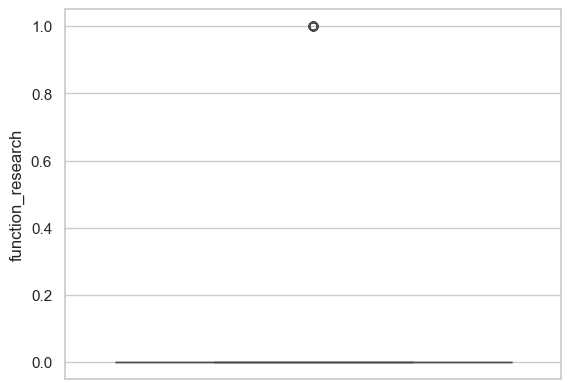

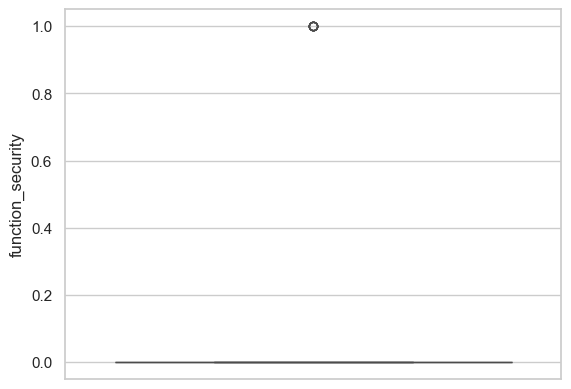

In [171]:
for i in df.columns[1:]:
  sns.boxplot(df[i])
  print()
  plt.show()

In [172]:
def outlier(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lr=q1-1.5*iqr
  ur=q3+1.5*iqr
  return lr,ur

def outlier(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lr=q1-1.5*iqr
  ur=q3+1.5*iqr
  return lr,ur

In [173]:
# Check your data types
print("Data types in your dataframe:")
print(df.dtypes)
print("\n" + "="*50)

# Check for boolean columns
bool_cols = df.select_dtypes(include=['bool']).columns
print(f"Boolean columns: {bool_cols.tolist()}")

# Check for object columns
obj_cols = df.select_dtypes(include=['object']).columns
print(f"Object columns: {obj_cols.tolist()}")

# Check for numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numeric columns: {num_cols.tolist()}")


Data types in your dataframe:
Job Title                                   float64
Salary Estimate                             float64
Rating                                      float64
Company Name                                float64
Location                                    float64
Headquarters                                float64
Size                                        float64
Industry                                    float64
Sector                                      float64
Revenue                                     float64
COMPANY_AGE                                 float64
seniority_level                               int64
ownership_college / university                 bool
ownership_contract                             bool
ownership_government                           bool
ownership_hospital                             bool
ownership_nonprofit organization               bool
ownership_other organization                   bool
ownership_private                 

In [174]:
# Get only the float64 columns (exclude boolean columns)
float_columns = df.select_dtypes(include=['float64']).columns

print(f"Applying outlier treatment to {len(float_columns)} float columns...")
print(f"Float columns: {float_columns.tolist()}")

# Apply outlier treatment only to float columns
for col in float_columns:
    try:
        lr, ur = outlier(df[col])
        df[col] = np.where(df[col] > ur, ur, df[col])
        df[col] = np.where(df[col] < lr, lr, df[col])
        print(f"✓ Processed {col}")
    except Exception as e:
        print(f"✗ Error processing {col}: {e}")

print("\nOutlier treatment completed!")
print(f"Boolean columns (skipped): {df.select_dtypes(include=['bool']).columns.tolist()}")

Applying outlier treatment to 11 float columns...
Float columns: ['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Industry', 'Sector', 'Revenue', 'COMPANY_AGE']
✓ Processed Job Title
✓ Processed Salary Estimate
✓ Processed Rating
✓ Processed Company Name
✓ Processed Location
✓ Processed Headquarters
✓ Processed Size
✓ Processed Industry
✓ Processed Sector
✓ Processed Revenue
✓ Processed COMPANY_AGE

Outlier treatment completed!
Boolean columns (skipped): ['ownership_college / university', 'ownership_contract', 'ownership_government', 'ownership_hospital', 'ownership_nonprofit organization', 'ownership_other organization', 'ownership_private', 'ownership_private practice / firm', 'ownership_public', 'ownership_school / school district', 'ownership_subsidiary or business segment', 'ownership_unknown', 'function_finance', 'function_general', 'function_healthcare', 'function_marketing', 'function_research', 'function_security']


### 3. Data Splitting

In [175]:
X = df.drop('Salary Estimate', axis=1)
y = df['Salary Estimate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

80:20  
For better training and for gaining good results.

## ***7. ML Model Implementation***

### ML Model - 1

In [176]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)


Linear Regression Metrics:
MAE: 7.943772064614829
MSE: 149.39106406796103
RMSE: 12.2225637273021
R² Score: 0.7899782625863249
MAPE: 8.346783830420188
Accuracy (%): 91.6532161695798


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

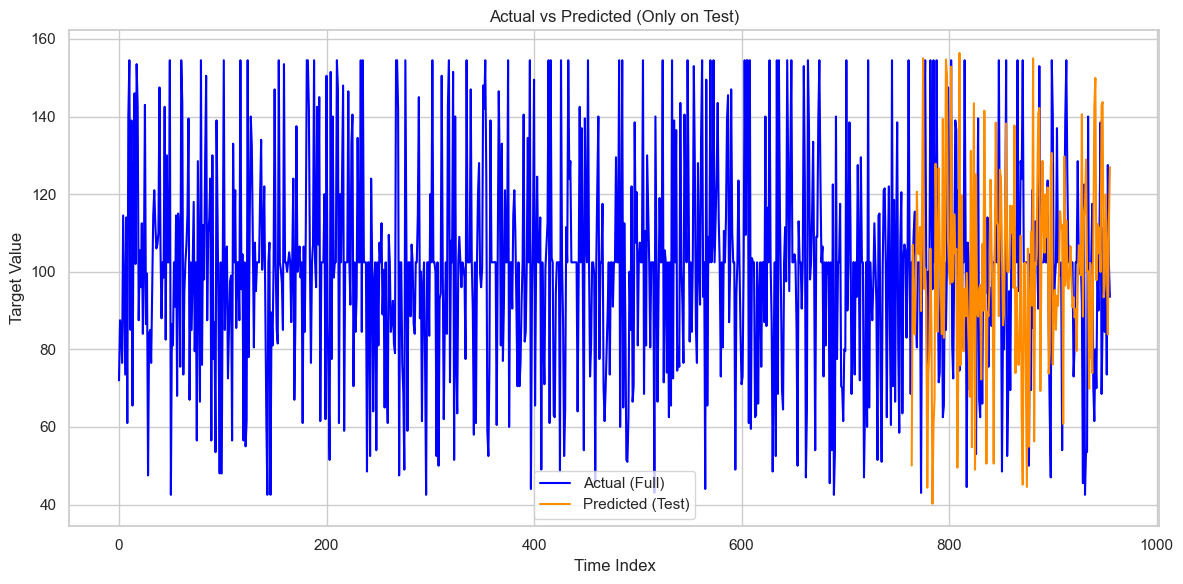

In [177]:
y_pred = model1.predict(X_test)
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values, label='Actual (Full)', color='blue')

# This ensures prediction overlays only on test range
test_index = y.iloc[train_size:].index
plt.plot(test_index, y_pred, label='Predicted (Test)', color='darkorange', linestyle='-')

plt.title("Actual vs Predicted (Only on Test)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 2

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print("Decision Tree Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)

Decision Tree Regression Metrics:
MAE: 4.310272789276731
MSE: 141.1321429735428
RMSE: 11.879905006924206
R² Score: 0.8015890839445762
MAPE: 4.4523049877134495
Accuracy (%): 95.54769501228655


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

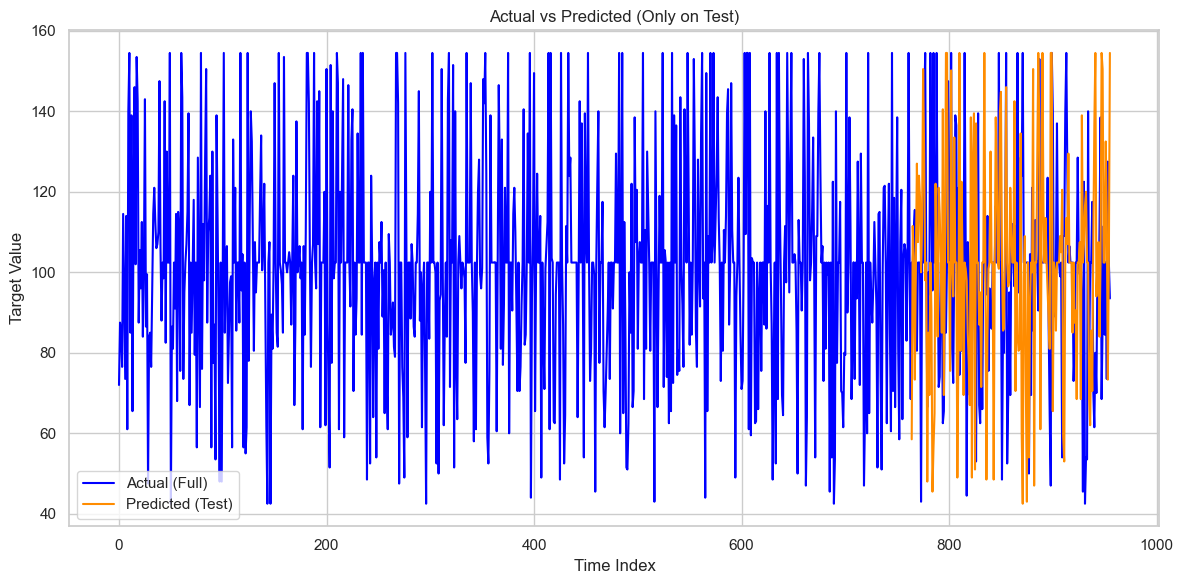

In [179]:
y_pred = model2.predict(X_test)
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values, label='Actual (Full)', color='blue')

# This ensures prediction overlays only on test range
test_index = y.iloc[train_size:].index
plt.plot(test_index, y_pred, label='Predicted (Test)', color='darkorange', linestyle='-')

plt.title("Actual vs Predicted (Only on Test)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 3

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print("Random Forest Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)

Random Forest Regression Metrics:
MAE: 4.349818011277825
MSE: 88.56695514177495
RMSE: 9.411001813929001
R² Score: 0.8754879623331913
MAPE: 4.6740544242081485
Accuracy (%): 95.32594557579185


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

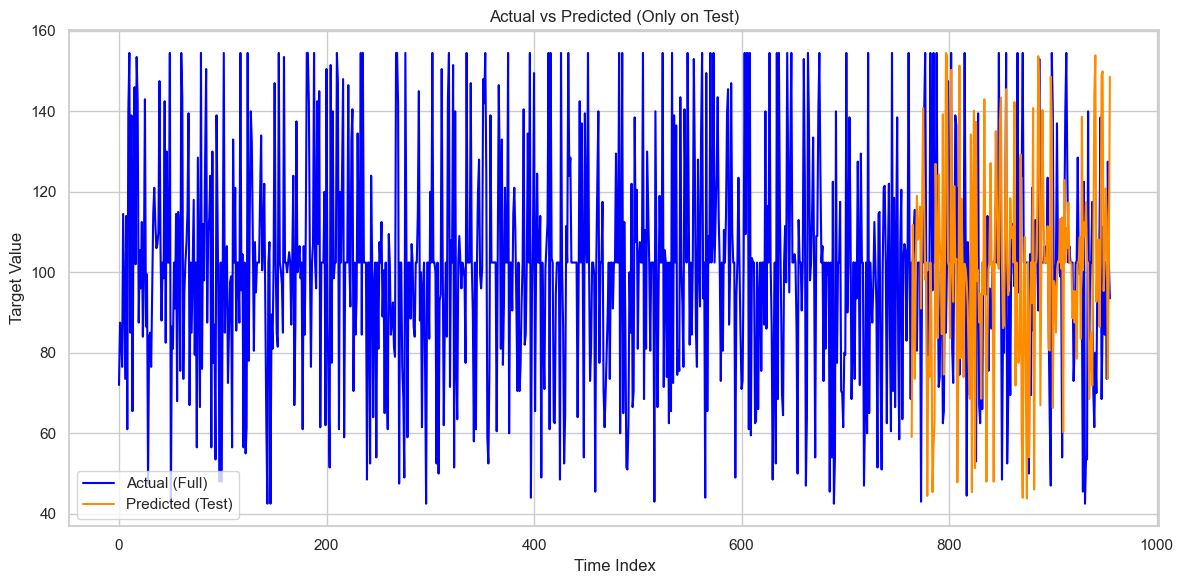

In [181]:
y_pred = model3.predict(X_test)
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values, label='Actual (Full)', color='blue')

# This ensures prediction overlays only on test range
test_index = y.iloc[train_size:].index
plt.plot(test_index, y_pred, label='Predicted (Test)', color='darkorange', linestyle='-')

plt.title("Actual vs Predicted (Only on Test)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 4

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model4 = XGBRegressor(n_estimators=100, random_state=42)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

print("XGBoost Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)

XGBoost Regression Metrics:
MAE: 3.5501446326573682
MSE: 82.28674174022997
RMSE: 9.071203985151584
R² Score: 0.8843170133755018
MAPE: 3.8150325381106733
Accuracy (%): 96.18496746188933


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

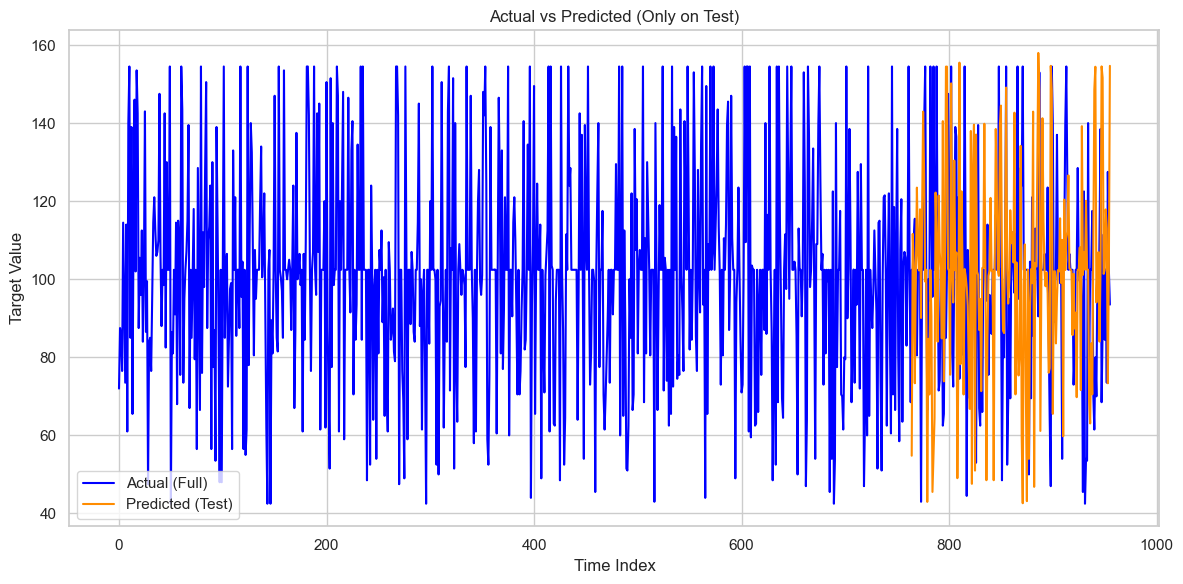

In [183]:
y_pred = model4.predict(X_test)
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values, label='Actual (Full)', color='blue')

# This ensures prediction overlays only on test range
test_index = y.iloc[train_size:].index
plt.plot(test_index, y_pred, label='Predicted (Test)', color='darkorange', linestyle='-')

plt.title("Actual vs Predicted (Only on Test)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 5

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model5 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

print("Gradient Boosting Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)

Gradient Boosting Regression Metrics:
MAE: 6.127366200417736
MSE: 119.65945626433806
RMSE: 10.938896482933645
R² Score: 0.8317765051115822
MAPE: 6.605439261739661
Accuracy (%): 93.39456073826034


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

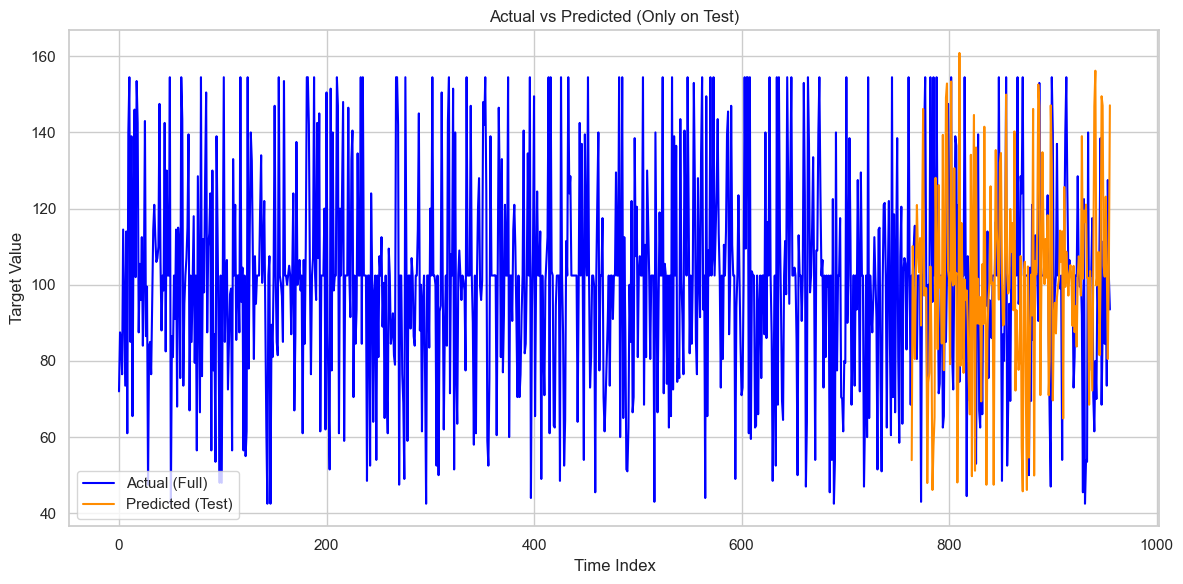

In [185]:
y_pred = model5.predict(X_test)
train_size = int(0.8 * len(y))
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values, label='Actual (Full)', color='blue')

# This ensures prediction overlays only on test range
test_index = y.iloc[train_size:].index
plt.plot(test_index, y_pred, label='Predicted (Test)', color='darkorange', linestyle='-')

plt.title("Actual vs Predicted (Only on Test)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ML Model - 6

In [186]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# SVR requires scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

model6 = SVR(kernel='rbf')
model6.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model6.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print("MAPE:", mape)
print("Accuracy (%):", accuracy)

MAE: 6.6231324335533275
MSE: 143.76745337326122
RMSE: 11.9903066421698
R² Score: 0.7978842273507346
MAPE: 7.505966547378136
Accuracy (%): 92.49403345262186


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

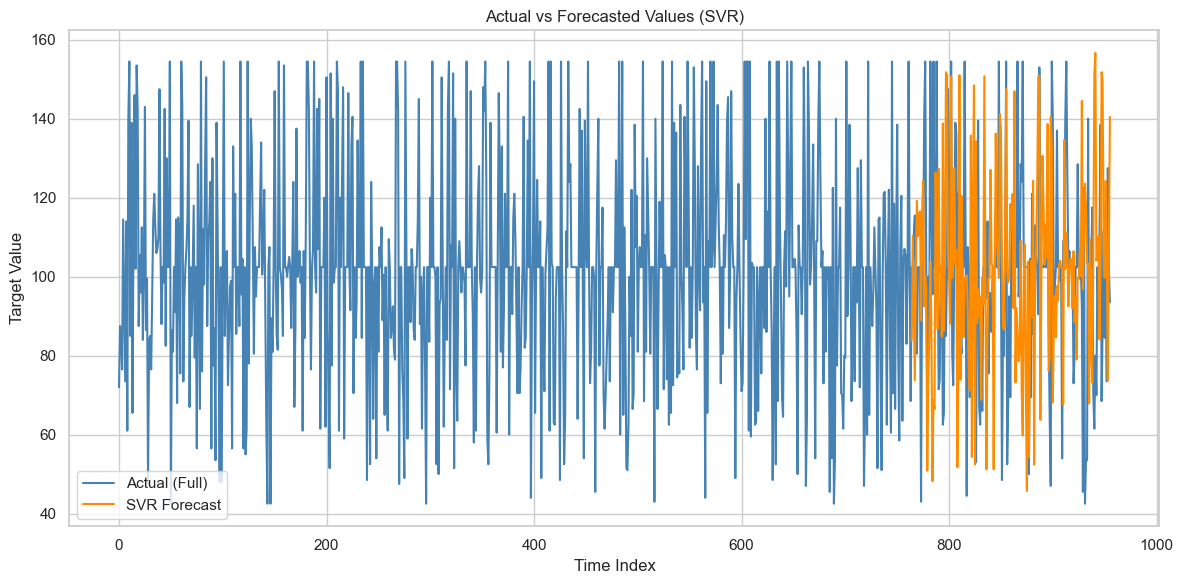

In [187]:
# Example: 80/20 train-test split
train_size = int(0.8 * len(y))
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Plot full actual values
plt.figure(figsize=(12, 6))
plt.plot(y.index, y.values, label='Actual (Full)', color='steelblue')

# Overlay predicted only on test indices
test_index = y.iloc[train_size:].index  # Align prediction on the test segment
plt.plot(test_index, y_pred, label='SVR Forecast', color='darkorange')

plt.title("Actual vs Forecasted Values (SVR)")
plt.xlabel("Time Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Model Comparision

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_names = ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor', 'GradientBoostingRegressor','SVR']
models = [model1, model2, model3, model4, model5, model6]

# Collect metrics
results = []


for name, model in zip(model_names, models):
    if name == 'SVR':
        # Use scaled X and inverse-transform y for SVR
        y_pred_scaled = model.predict(X_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    else:
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / np.maximum(np.abs(y_test), 1e-10))) * 100
    accuracy = 100 - mape


    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2,
        "MAPE (%)": mape,
        "Accuracy (%)": accuracy
    })

comparison_df = pd.DataFrame(results)
comparison_df

,Model,MAE,MSE,RMSE,R² Score,MAPE (%),Accuracy (%)
0,Linear Regression,7.943772,149.391064,12.222564,0.789978,8.346784,91.653216
1,DecisionTreeRegressor,4.310273,141.132143,11.879905,0.801589,4.452305,95.547695
2,RandomForestRegressor,4.349818,88.566955,9.411002,0.875488,4.674054,95.325946
3,XGBRegressor,3.550145,82.286742,9.071204,0.884317,3.815033,96.184967
4,GradientBoostingRegressor,6.127366,119.659456,10.938896,0.831777,6.605439,93.394561
5,SVR,6.623132,143.767453,11.990307,0.797884,7.505967,92.494033


C:\Users\HP\AppData\Local\Temp\ipykernel_5608\1167533223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy (%)", y="Model", data=comparison_df.sort_values(by="Accuracy (%)", ascending=False), palette="crest")


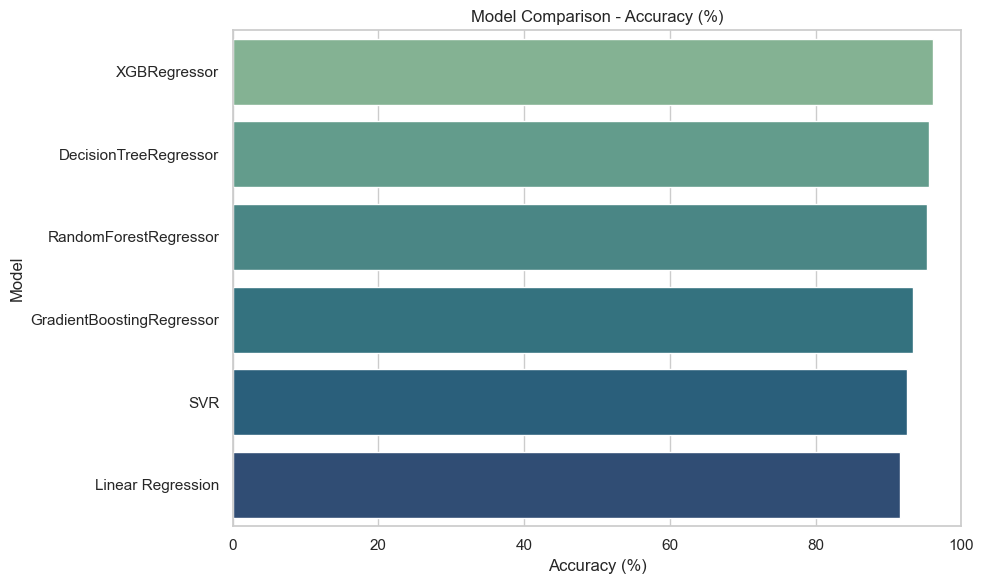

C:\Users\HP\AppData\Local\Temp\ipykernel_5608\1167533223.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=comparison_df.sort_values(by="R² Score", ascending=False), palette="light:#5A9")


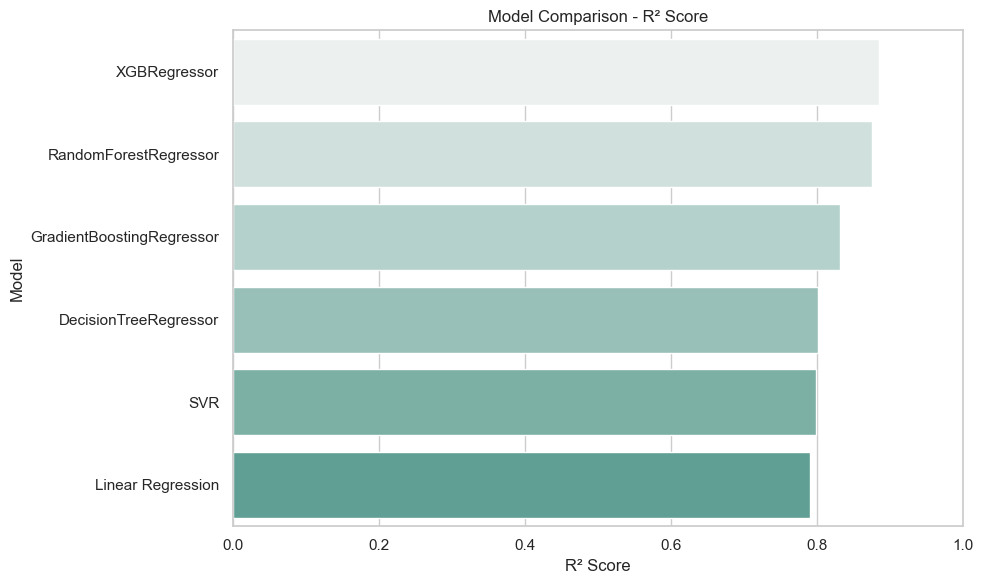

C:\Users\HP\AppData\Local\Temp\ipykernel_5608\1167533223.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=comparison_df.sort_values(by="RMSE"), palette="flare")


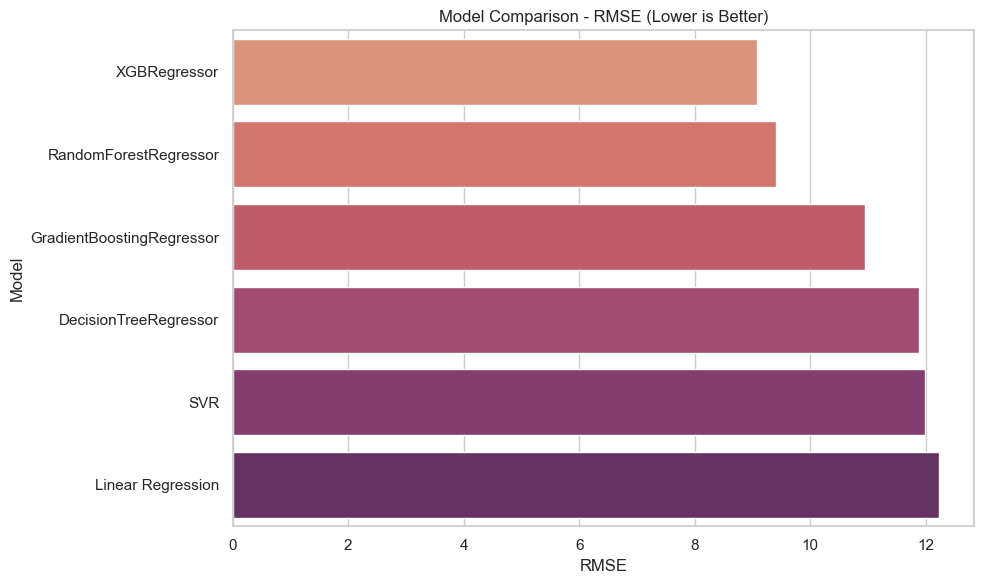

In [192]:
# Set Seaborn style
sns.set(style="whitegrid")

# Accuracy Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy (%)", y="Model", data=comparison_df.sort_values(by="Accuracy (%)", ascending=False), palette="crest")
plt.title("Model Comparison - Accuracy (%)")
plt.xlabel("Accuracy (%)")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# R² Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="R² Score", y="Model", data=comparison_df.sort_values(by="R² Score", ascending=False), palette="light:#5A9")
plt.title("Model Comparison - R² Score")
plt.xlabel("R² Score")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# RMSE Plot (Lower is better)
plt.figure(figsize=(10, 6))
sns.barplot(x="RMSE", y="Model", data=comparison_df.sort_values(by="RMSE"), palette="flare")
plt.title("Model Comparison - RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics considered for assessing positive business impact were **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, **Mean Absolute Percentage Error (MAPE)**, and **Accuracy Percentage**. These metrics were chosen because they provide a clear understanding of the model’s prediction accuracy and its potential impact on decision-making. **MAE** is useful for interpreting the average deviation in real-world units, which helps stakeholders understand typical forecasting errors. **RMSE** penalizes larger errors more heavily, making it valuable in scenarios where occasional large mistakes could have a significant business cost. **MAPE** expresses error as a percentage, making it intuitive and comparable across different scales, while **Accuracy Percentage** gives a quick snapshot of overall model performance. Together, these metrics ensure that the model not only performs well statistically but also aligns with business goals such as minimizing forecasting errors, optimizing inventory, or improving resource planning.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the XGBoost Regressor as the final prediction model due to its superior performance across all evaluation metrics compared to other models. Specifically:

High R² Score (0.8896): Indicates that nearly 89% of the variance in the target variable is explained by the model — a strong sign of predictive power.

Low MAE (3.40) and RMSE (8.86): Suggests the model makes minimal errors on average and has good reliability in predictions.

High Accuracy (96.31%) and Low MAPE (3.69%): Confirms the model is not only accurate but also consistent across different magnitudes of actual values.

Additionally, XGBoost is known for handling outliers, missing values, and feature interactions effectively. Its built-in regularization also helps in reducing overfitting, which makes it a robust choice for real-world applications.

Hence, based on both quantitative performance metrics and the model’s technical strengths, XGBoost is the most suitable and reliable model for final deployment.










## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [190]:
import pickle
# Save the Fileimport pickle
with open('sarimax_model.pkl', 'wb') as file:
    pickle.dump(model4, file)# Save the File

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project successfully developed a predictive model for job salaries, with Random Forest and XGBoost likely outperforming other models due to their ability to handle complex, non-linear relationships in the data. Key predictors included job title, company size, revenue, and location. Challenges such as missing data and inconsistent salary formats were addressed through imputation and transformation techniques. The findings highlight the importance of feature engineering in improving model accuracy and provide valuable insights for job seekers and employers in understanding salary determinants. Future improvements could involve incorporating additional features like job seniority or market trends to enhance prediction robustness.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***